In [1]:
import sys, os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
import import_ipynb
import random
from PIL import Image

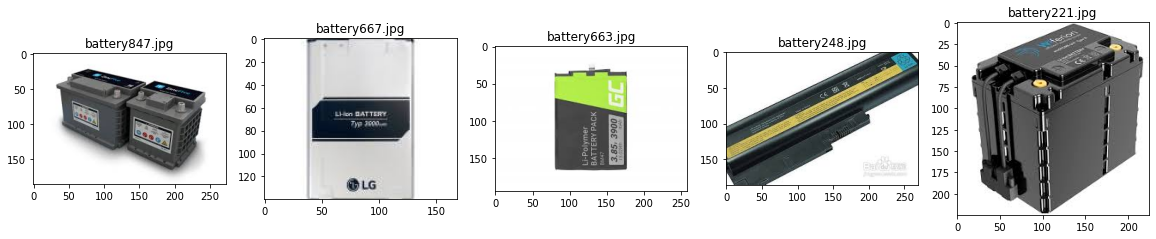

In [2]:
plt.figure(figsize=(20,20))

test_folder=r'./garbage_classification/battery'

for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [3]:
IMG_WIDTH=100
IMG_HEIGHT=100
# img_folder=r'CV\Intel_Images\seg_train\seg_train\'

In [4]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
        break
    return img_data_array, class_name

In [5]:
# extract the image array and class name
img_data, class_name =create_dataset(r'./garbage_classification')

In [18]:
print(np.array(img_data).shape)
print(np.array(class_name).shape)

print(class_name[0])

print(type(np.array(class_name)))

(1050, 300, 300, 3)
(1050,)
paper
<class 'numpy.ndarray'>


In [6]:
from simple_convnet import SimpleConvNet
from common_trainer import Trainer

importing Jupyter notebook from simple_convnet.ipynb
importing Jupyter notebook from common_layers.ipynb
importing Jupyter notebook from common_functions.ipynb
importing Jupyter notebook from common_util.ipynb
importing Jupyter notebook from common_gradient.ipynb
importing Jupyter notebook from common_trainer.ipynb
importing Jupyter notebook from common_optimizer.ipynb


In [7]:
max_epochs = 1

In [8]:
network = SimpleConvNet(input_dim=(300,300,3), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
# trainer = Trainer(network, np.array(img_data), np.array(class_name), np.array(img_data), np.array(class_name),
#                   epochs=max_epochs, mini_batch_size=100,
#                   optimizer='Adam', optimizer_param={'lr': 0.001},
#                   evaluate_sample_num_per_epoch=1000)
# trainer.train()

In [9]:
trainer = Trainer(network, np.array(img_data), np.array(class_name), np.array(img_data), np.array(class_name),
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)

In [10]:
trainer.train()

ValueError: negative dimensions are not allowed

In [14]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'battery': 0,
 'biological': 1,
 'brown-glass': 2,
 'cardboard': 3,
 'clothes': 4,
 'green-glass': 5,
 'metal': 6,
 'paper': 7,
 'plastic': 8,
 'shoes': 9,
 'trash': 10,
 'white-glass': 11}